In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
data = pd.read_csv("mobility_data_with_names.csv", delimiter=',', index_col='ID')
display(data)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
ID,,,,,,,,,,,
0,10000,Totaal,Totaal,Nederland,2010,2.77,30.31,62.54,963.0,10536.0,362.3
1,10000,Totaal,Totaal,Nederland,2011,2.67,30.69,61.33,928.0,10675.0,355.5
2,10000,Totaal,Totaal,Nederland,2012,2.68,29.39,60.45,936.0,10253.0,351.5
3,10000,Totaal,Totaal,Nederland,2013,2.68,30.49,61.18,933.0,10611.0,354.8
4,10000,Totaal,Totaal,Nederland,2014,2.69,30.74,62.74,937.0,10694.0,363.8
...,...,...,...,...,...,...,...,...,...,...,...
126715,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2013,NaN,NaN,NaN,NaN,NaN,NaN
126716,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2014,NaN,NaN,NaN,NaN,NaN,NaN
126717,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Verplaatsingen_1', 'Afstand_2']]
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (uitsluiten van alleen populatie 12 jaar of ouder)
car_and_train = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein', 'Totaal'])] # filter data on cars

## Kilometers per year

In [19]:
car_and_train_total = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Totaal'])]
total_Nederland = car_and_train_total[car_and_train_total['RegioS'].isin(['Groningen (PV)', 'Friesland (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'])]

C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\2938134531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland['Datum'] = (
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\2938134531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland['Datum'] = pd.to_datetime(total_Nederland['Datum'])


,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Dag,Maand
Datum,,,,,,,,,
2010-01-01,10000,Totaal,Totaal,Groningen (PV),2010,2.75,35.75,1,1
2011-01-01,10000,Totaal,Totaal,Groningen (PV),2011,2.68,35.85,1,1
2012-01-01,10000,Totaal,Totaal,Groningen (PV),2012,2.62,33.01,1,1
2013-01-01,10000,Totaal,Totaal,Groningen (PV),2013,2.62,31.84,1,1
2014-01-01,10000,Totaal,Totaal,Groningen (PV),2014,2.65,32.12,1,1
...,...,...,...,...,...,...,...,...,...
2013-01-01,10000,Totaal,Totaal,Limburg (PV),2013,2.63,28.87,1,1
2014-01-01,10000,Totaal,Totaal,Limburg (PV),2014,2.69,26.34,1,1
2015-01-01,10000,Totaal,Totaal,Limburg (PV),2015,2.58,26.97,1,1


,Groningen,Friesland,Drenthe,Overijssel,Flevoland,Gelderland,Utrecht,Noord-Holland,Zuid-Holland,Zeeland,Noord-Brabant,Limburg
Datum,,,,,,,,,,,,
2010-01-01,35.75,32.36,35.66,30.38,38.05,33.11,30.60,28.74,27.34,32.72,30.28,28.18
2011-01-01,35.85,30.31,34.90,31.25,35.32,31.69,30.40,30.63,27.86,31.80,32.01,28.54
2012-01-01,33.01,30.98,32.65,29.47,35.92,28.82,32.80,27.81,28.00,32.88,30.23,25.17
2013-01-01,31.84,32.99,36.36,29.98,32.94,31.12,33.27,28.91,27.69,33.65,32.33,28.87
2014-01-01,32.12,33.95,35.77,30.87,35.75,32.98,34.31,29.16,28.22,30.87,31.38,26.34
2015-01-01,32.39,31.65,35.38,28.19,38.76,31.47,31.20,27.83,27.29,28.17,29.88,26.97
2016-01-01,32.00,32.47,35.60,28.41,34.85,32.17,30.67,27.36,27.75,29.84,29.44,26.06
2017-01-01,32.19,28.84,32.15,30.28,37.03,30.26,31.07,27.40,27.02,28.68,29.29,28.69


<Axes: xlabel='Datum'>

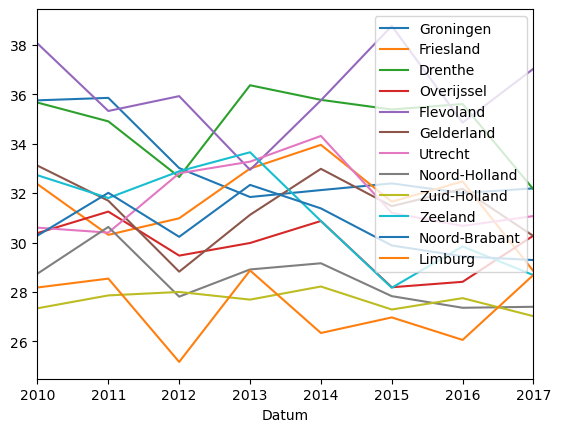

In [22]:
total_Nederland.loc[:, 'Dag'] = 1
total_Nederland.loc[:, 'Maand'] = 1

total_Nederland['Datum'] = (
    total_Nederland['Perioden'].astype(str) + '-' +
    total_Nederland['Maand'].astype(str).str.zfill(2) + '-' +
    total_Nederland['Dag'].astype(str).str.zfill(2)
)
total_Nederland['Datum'] = pd.to_datetime(total_Nederland['Datum'])
total_Nederland.set_index('Datum', inplace=True)
total_Nederland = total_Nederland[total_Nederland['Vervoerwijzen'].isin(['Totaal'])]
display(total_Nederland)

groningen = total_Nederland[total_Nederland['RegioS'] == 'Groningen (PV)']
friesland = total_Nederland[total_Nederland['RegioS'] == 'Friesland (PV)']
drenthe = total_Nederland[total_Nederland['RegioS'] == 'Drenthe (PV)']
overijssel = total_Nederland[total_Nederland['RegioS'] == 'Overijssel (PV)']
flevoland = total_Nederland[total_Nederland['RegioS'] == 'Flevoland (PV)']
gelderland = total_Nederland[total_Nederland['RegioS'] == 'Gelderland (PV)']
utrecht = total_Nederland[total_Nederland['RegioS'] == 'Utrecht (PV)']
noord_holland= total_Nederland[total_Nederland['RegioS'] == 'Noord-Holland (PV)']
zuid_holland = total_Nederland[total_Nederland['RegioS'] == 'Zuid-Holland (PV)']
zeeland = total_Nederland[total_Nederland['RegioS'] == 'Zeeland (PV)']
noord_brabant = total_Nederland[total_Nederland['RegioS'] == 'Noord-Brabant (PV)']
limburg = total_Nederland[total_Nederland['RegioS'] == 'Limburg (PV)']


totaal_per_provincie = groningen[['Afstand_2']].copy()
totaal_per_provincie.rename(columns={'Afstand_2': 'Groningen'}, inplace=True)
totaal_per_provincie['Friesland'] = friesland[['Afstand_2']]
totaal_per_provincie['Drenthe'] = drenthe[['Afstand_2']]
totaal_per_provincie['Overijssel'] = overijssel[['Afstand_2']]
totaal_per_provincie['Flevoland'] = flevoland[['Afstand_2']]
totaal_per_provincie['Gelderland'] = gelderland[['Afstand_2']]
totaal_per_provincie['Utrecht'] = utrecht[['Afstand_2']]
totaal_per_provincie['Noord-Holland'] = noord_holland[['Afstand_2']]
totaal_per_provincie['Zuid-Holland'] = zuid_holland[['Afstand_2']]
totaal_per_provincie['Zeeland'] = zeeland[['Afstand_2']]
totaal_per_provincie['Noord-Brabant'] = noord_brabant[['Afstand_2']]
totaal_per_provincie['Limburg'] = limburg[['Afstand_2']]

display(totaal_per_provincie)
totaal_per_provincie.plot()


# auto_bestuurder_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (bestuurder)']
# auto_passagier_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (passagier)']
# trein_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Trein']

# nederland_per_year = auto_bestuurder_NL[['Afstand_2']].copy()
# nederland_per_year.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
# nederland_per_year['Auto (passagier)'] = auto_passagier_NL[['Afstand_2']]
# nederland_per_year['Auto (totaal)'] = nederland_per_year['Auto (bestuurder)'] + nederland_per_year['Auto (passagier)']
# nederland_per_year['Trein'] = trein_NL[['Afstand_2']]

# # nederland_per_year = auto_bestuurder_NL[['Verplaatsingen_1']].copy()
# # nederland_per_year.rename(columns={'Verplaatsingen_1': 'Auto (bestuurder)'}, inplace=True)
# # nederland_per_year['Auto (passagier)'] = auto_passagier_NL[['Verplaatsingen_1']]
# # nederland_per_year['Auto (totaal)'] = nederland_per_year['Auto (bestuurder)'] + nederland_per_year['Auto (passagier)']
# # nederland_per_year['Trein'] = trein_NL[['Verplaatsingen_1']]

# display(nederland_per_year)
# nederland_per_year.plot()
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.title('Car and train kilometers per year')
# plt.ylabel('Average kilometers per day per year [km/day]')

## Kilometers per month

In [6]:
car_and_train_per_month = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Verplaatsing in januari', 
                                                       'Verplaatsing in februari', 
                                                       'Verplaatsing in maart', 
                                                       'Verplaatsing in april', 
                                                       'Verplaatsing in mei', 
                                                       'Verplaatsing in juni',
                                                       'Verplaatsing in juli',
                                                       'Verplaatsing in augustus',
                                                       'Verplaatsing in september',
                                                       'Verplaatsing in oktober',
                                                       'Verplaatsing in november',
                                                       'Verplaatsing in december'])]
                              

In [7]:
kenmerken_months = ['Verplaatsing in januari', 
                    'Verplaatsing in februari',
                    'Verplaatsing in maart',
                    'Verplaatsing in april',
                    'Verplaatsing in mei',
                    'Verplaatsing in juni',
                    'Verplaatsing in juli',
                    'Verplaatsing in augustus',
                    'Verplaatsing in september',
                    'Verplaatsing in oktober',
                    'Verplaatsing in november',
                    'Verplaatsing in december',]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

replace_dict = dict(zip(kenmerken_months, months))
car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
car_and_train_per_month.loc[:, 'Dag'] = 1

car_and_train_per_month['Datum'] = (
    car_and_train_per_month['Perioden'].astype(str) + '-' +
    car_and_train_per_month['KenmerkenVerplaatsing'].astype(str).str.zfill(2) + '-' +
    car_and_train_per_month['Dag'].astype(str).str.zfill(2)
)
car_and_train_per_month['Datum'] = pd.to_datetime(car_and_train_per_month['Datum'])
car_and_train_per_month.set_index('Datum', inplace=True)

C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\140228646.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\140228646.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\1402

C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\1386219905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_bestuurder.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\1386219905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_passagier.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\1386219905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trein.sort_index(inpl

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.96,7.17,23.13,1.94
2010-02-01,15.45,6.06,21.51,2.94
2010-03-01,16.12,7.08,23.20,2.36
2010-04-01,16.09,7.37,23.46,2.55
2010-05-01,13.28,8.63,21.91,2.26
...,...,...,...,...
2017-08-01,14.80,5.78,20.58,2.09
2017-09-01,14.57,6.38,20.95,3.39
2017-10-01,15.39,6.19,21.58,3.54


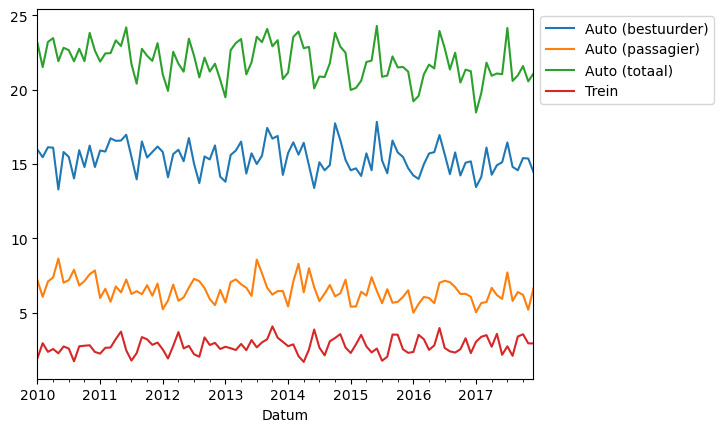

In [8]:
car_and_train_nl = car_and_train_per_month[car_and_train_per_month['RegioS'] == 'Nederland']

car_bestuurder = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (bestuurder)']
car_passagier = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (passagier)']
trein = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Trein']

car_bestuurder.sort_index(inplace=True)
car_passagier.sort_index(inplace=True)
trein.sort_index(inplace=True)

data_Nederland = car_bestuurder[['Afstand_2']].copy()
data_Nederland.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
data_Nederland['Auto (passagier)'] = car_passagier[['Afstand_2']]
data_Nederland['Auto (totaal)'] = data_Nederland['Auto (bestuurder)'] + data_Nederland['Auto (passagier)']
data_Nederland['Trein'] = trein[['Afstand_2']]
display(data_Nederland)

# data_Nederland = car_bestuurder[['Verplaatsingen_1']].copy()
# data_Nederland.rename(columns={'Verplaatsingen_1': 'Auto (bestuurder)'}, inplace=True)
# data_Nederland['Auto (passagier)'] = car_passagier[['Verplaatsingen_1']]
# data_Nederland['Auto (totaal)'] = data_Nederland['Auto (bestuurder)'] + data_Nederland['Auto (passagier)']
# data_Nederland['Trein'] = trein[['Verplaatsingen_1']]
# display(data_Nederland)

data_Nederland.plot()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Total Kilometer per year per Province

In [9]:
total_province = car_and_train_total[car_and_train_total['RegioS'].isin(['Groningen (PV)', 
                                                                         'Friesland (PV)', 
                                                                         'Drenthe (PV)', 
                                                                         'Overijssel (PV)',
                                                                         'Flevoland (PV)',
                                                                         'Gelderland (PV)',
                                                                         'Utrecht (PV)',
                                                                         'Noord-Holland (PV)',
                                                                         'Zuid-Holland (PV)',
                                                                         'Zeeland (PV)',
                                                                         'Noord-Brabant (PV)',
                                                                         'Limburg (PV)'])]
display(total_province)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2
ID,,,,,,,
40,10000,Totaal,Totaal,Groningen (PV),2010,2.75,35.75
41,10000,Totaal,Totaal,Groningen (PV),2011,2.68,35.85
42,10000,Totaal,Totaal,Groningen (PV),2012,2.62,33.01
43,10000,Totaal,Totaal,Groningen (PV),2013,2.62,31.84
44,10000,Totaal,Totaal,Groningen (PV),2014,2.65,32.12
...,...,...,...,...,...,...,...
21251,10000,Trein,Totaal,Limburg (PV),2013,0.04,1.97
21252,10000,Trein,Totaal,Limburg (PV),2014,0.05,2.52
21253,10000,Trein,Totaal,Limburg (PV),2015,0.05,2.76


In [10]:
total_province.loc[:, 'Dag'] = 1
total_province.loc[:, 'Maand'] = 1

total_province['Datum'] = (
    total_province['Perioden'].astype(str) + '-' +
    total_province['Maand'].astype(str).str.zfill(2) + '-' +
    total_province['Dag'].astype(str).str.zfill(2)
)
total_province['Datum'] = pd.to_datetime(total_province['Datum'])
total_province.set_index('Datum', inplace=True)
display(total_province)

C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\621756361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\621756361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\621756361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Dag,Maand
Datum,,,,,,,,,
2010-01-01,10000,Totaal,Totaal,Groningen (PV),2010,2.75,35.75,1,1
2011-01-01,10000,Totaal,Totaal,Groningen (PV),2011,2.68,35.85,1,1
2012-01-01,10000,Totaal,Totaal,Groningen (PV),2012,2.62,33.01,1,1
2013-01-01,10000,Totaal,Totaal,Groningen (PV),2013,2.62,31.84,1,1
2014-01-01,10000,Totaal,Totaal,Groningen (PV),2014,2.65,32.12,1,1
...,...,...,...,...,...,...,...,...,...
2013-01-01,10000,Trein,Totaal,Limburg (PV),2013,0.04,1.97,1,1
2014-01-01,10000,Trein,Totaal,Limburg (PV),2014,0.05,2.52,1,1
2015-01-01,10000,Trein,Totaal,Limburg (PV),2015,0.05,2.76,1,1


,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,16.91,10.78,27.69,2.84
2011-01-01,18.29,7.49,25.78,4.01
2012-01-01,16.78,6.35,23.13,4.18
2013-01-01,14.42,8.85,23.27,3.01
2014-01-01,15.45,7.26,22.71,3.34
2015-01-01,15.21,7.73,22.94,NaN
2016-01-01,14.91,8.19,23.10,NaN
2017-01-01,14.44,8.18,22.62,NaN


,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,0.1691,0.1078,0.2769,0.0284
2011-01-01,0.1829,0.0749,0.2578,0.0401
2012-01-01,0.1678,0.0635,0.2313,0.0418
2013-01-01,0.1442,0.0885,0.2327,0.0301
2014-01-01,0.1545,0.0726,0.2271,0.0334
2015-01-01,0.1521,0.0773,0.2294,NaN
2016-01-01,0.1491,0.0819,0.2310,NaN
2017-01-01,0.1444,0.0818,0.2262,NaN


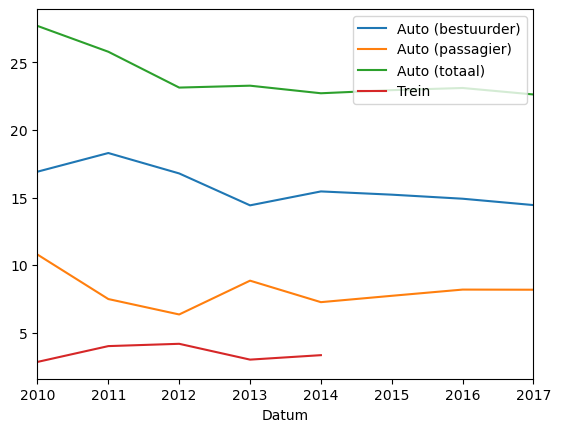

In [11]:
provinces = total_province['RegioS'].unique()
# province_name = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
data_per_province = {}

for province in provinces:
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    car_bestuurder = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']
    car_passagier = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']
    trein = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']
    
    car_bestuurder.sort_index(inplace=True)
    car_passagier.sort_index(inplace=True)
    trein.sort_index(inplace=True)
    
    data_province = car_bestuurder[['Afstand_2']].copy()
    data_province.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
    data_province['Auto (passagier)'] = car_passagier[['Afstand_2']]
    data_province['Auto (totaal)'] = data_province['Auto (bestuurder)'] + data_province['Auto (passagier)']
    data_province['Trein'] = trein[['Afstand_2']]
    
    data_per_province[province] = data_province
    
    # data_province.plot(title=f'Average kilometer in {province} per car and train')
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # plt.show()

display(data_per_province['Groningen (PV)'])
data_per_province['Groningen (PV)'].plot()

percentage_Groningen = data_per_province['Groningen (PV)'] / 100
display(percentage_Groningen)

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,16.91,10.78,27.69,2.84
2011-01-01,18.29,7.49,25.78,4.01
2012-01-01,16.78,6.35,23.13,4.18
2013-01-01,14.42,8.85,23.27,3.01
2014-01-01,15.45,7.26,22.71,3.34
2015-01-01,15.21,7.73,22.94,NaN
2016-01-01,14.91,8.19,23.10,NaN
2017-01-01,14.44,8.18,22.62,NaN


,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,0.1691,0.1078,0.2769,0.0284
2011-01-01,0.1829,0.0749,0.2578,0.0401
2012-01-01,0.1678,0.0635,0.2313,0.0418
2013-01-01,0.1442,0.0885,0.2327,0.0301
2014-01-01,0.1545,0.0726,0.2271,0.0334
2015-01-01,0.1521,0.0773,0.2294,NaN
2016-01-01,0.1491,0.0819,0.2310,NaN
2017-01-01,0.1444,0.0818,0.2262,NaN


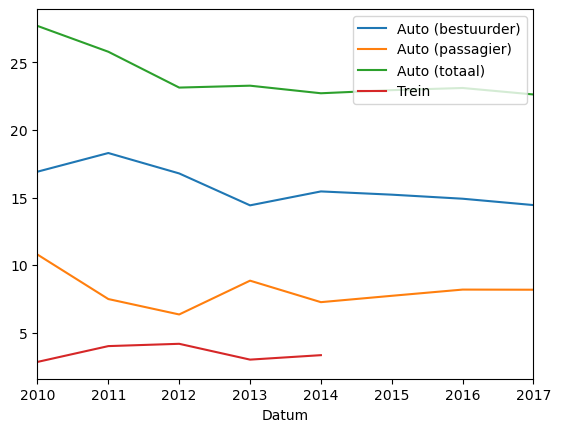

In [12]:
provinces = total_province['RegioS'].unique()
# province_name = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
data_per_province = {}

for province in provinces:
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    car_bestuurder = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']
    car_passagier = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']
    trein = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']
    
    car_bestuurder.sort_index(inplace=True)
    car_passagier.sort_index(inplace=True)
    trein.sort_index(inplace=True)
    
    data_province = car_bestuurder[['Afstand_2']].copy()
    data_province.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
    data_province['Auto (passagier)'] = car_passagier[['Afstand_2']]
    data_province['Auto (totaal)'] = data_province['Auto (bestuurder)'] + data_province['Auto (passagier)']
    data_province['Trein'] = trein[['Afstand_2']]
    
    data_per_province[province] = data_province
    
    # data_province.plot(title=f'Average kilometer in {province} per car and train')
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # plt.show()

display(data_per_province['Groningen (PV)'])
data_per_province['Groningen (PV)'].plot()

percentage_Groningen = data_per_province['Groningen (PV)'] / 100
display(percentage_Groningen)

## Total kilometers per province

...

In [13]:
totaal_aantal_kilometers = car_and_train_total[car_and_train_total['Vervoerwijzen'].isin(['Totaal'])]
totaal_aantal_kilometers_per_provincie = totaal_aantal_kilometers[totaal_aantal_kilometers['RegioS'].isin(['Groningen (PV)', 
                                                                                                           'Friesland (PV)', 
                                                                                                           'Drenthe (PV)', 
                                                                                                           'Overijssel (PV)', 
                                                                                                           'Flevoland (PV)', 
                                                                                                           'Gelderland (PV)', 
                                                                                                           'Utrecht (PV)', 
                                                                                                           'Noord-Holland (PV)', 
                                                                                                           'Zuid-Holland (PV)', 
                                                                                                           'Zeeland (PV)', 
                                                                                                           'Noord-Brabant (PV)', 
                                                                                                           'Limburg (PV)'])]
# display(totaal_aantal_kilometers_per_provincie)


C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\2197653397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaal_aantal_kilometers_per_provincie.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\2197653397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totaal_aantal_kilometers_per_provincie.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_12268\2197653397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Groningen,Friesland,Drenthe,Overijssel,Flevoland,Gelderland,Utrecht,Noord-Holland,Zuid-Holland,Zeeland,Noord-Brabant,Limburg
Datum,,,,,,,,,,,,
2010-01-01,35.75,32.36,35.66,30.38,38.05,33.11,30.60,28.74,27.34,32.72,30.28,28.18
2011-01-01,35.85,30.31,34.90,31.25,35.32,31.69,30.40,30.63,27.86,31.80,32.01,28.54
2012-01-01,33.01,30.98,32.65,29.47,35.92,28.82,32.80,27.81,28.00,32.88,30.23,25.17
2013-01-01,31.84,32.99,36.36,29.98,32.94,31.12,33.27,28.91,27.69,33.65,32.33,28.87
2014-01-01,32.12,33.95,35.77,30.87,35.75,32.98,34.31,29.16,28.22,30.87,31.38,26.34
2015-01-01,32.39,31.65,35.38,28.19,38.76,31.47,31.20,27.83,27.29,28.17,29.88,26.97
2016-01-01,32.00,32.47,35.60,28.41,34.85,32.17,30.67,27.36,27.75,29.84,29.44,26.06
2017-01-01,32.19,28.84,32.15,30.28,37.03,30.26,31.07,27.40,27.02,28.68,29.29,28.69


<Axes: xlabel='Datum'>

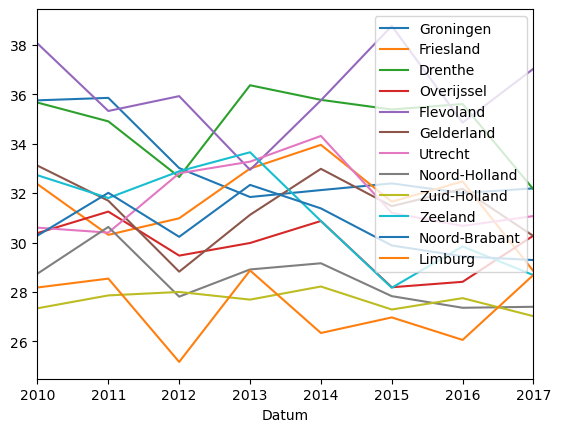

In [14]:
totaal_aantal_kilometers_per_provincie.loc[:, 'Dag'] = 1
totaal_aantal_kilometers_per_provincie.loc[:, 'Maand'] = 1

totaal_aantal_kilometers_per_provincie['Datum'] = (
    totaal_aantal_kilometers_per_provincie['Perioden'].astype(str) + '-' +
    totaal_aantal_kilometers_per_provincie['Maand'].astype(str).str.zfill(2) + '-' +
    totaal_aantal_kilometers_per_provincie['Dag'].astype(str).str.zfill(2)
)
totaal_aantal_kilometers_per_provincie['Datum'] = pd.to_datetime(totaal_aantal_kilometers_per_provincie['Datum'])
totaal_aantal_kilometers_per_provincie.set_index('Datum', inplace=True)

groningen = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Groningen (PV)']
friesland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Friesland (PV)']
drenthe = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Drenthe (PV)']
overijssel = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Overijssel (PV)']
flevoland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Flevoland (PV)']
gelderland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Gelderland (PV)']
utrecht = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Utrecht (PV)']
noord_holland= totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Noord-Holland (PV)']
zuid_holland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Zuid-Holland (PV)']
zeeland = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Zeeland (PV)']
noord_brabant = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Noord-Brabant (PV)']
limburg = totaal_aantal_kilometers_per_provincie[totaal_aantal_kilometers_per_provincie['RegioS'] == 'Limburg (PV)']


totaal_per_provincie = groningen[['Afstand_2']].copy()
totaal_per_provincie.rename(columns={'Afstand_2': 'Groningen'}, inplace=True)
totaal_per_provincie['Friesland'] = friesland[['Afstand_2']]
totaal_per_provincie['Drenthe'] = drenthe[['Afstand_2']]
totaal_per_provincie['Overijssel'] = overijssel[['Afstand_2']]
totaal_per_provincie['Flevoland'] = flevoland[['Afstand_2']]
totaal_per_provincie['Gelderland'] = gelderland[['Afstand_2']]
totaal_per_provincie['Utrecht'] = utrecht[['Afstand_2']]
totaal_per_provincie['Noord-Holland'] = noord_holland[['Afstand_2']]
totaal_per_provincie['Zuid-Holland'] = zuid_holland[['Afstand_2']]
totaal_per_provincie['Zeeland'] = zeeland[['Afstand_2']]
totaal_per_provincie['Noord-Brabant'] = noord_brabant[['Afstand_2']]
totaal_per_provincie['Limburg'] = limburg[['Afstand_2']]

display(totaal_per_provincie)
totaal_per_provincie.plot()

In [15]:
# Handig:
# [''Groningen (PV)', 'Friesland (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'])]

<Axes: xlabel='Datum'>

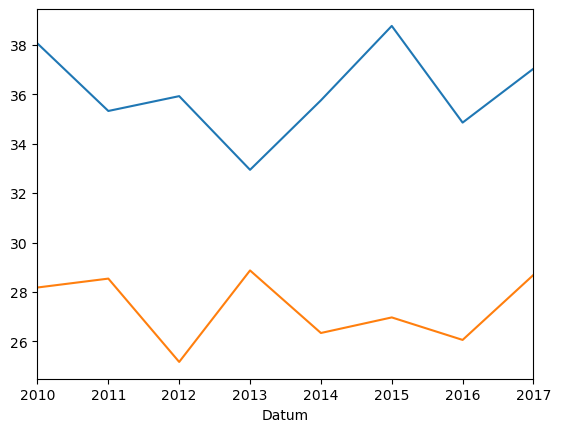

In [16]:
totaal_per_provincie['Flevoland'].plot()
totaal_per_provincie['Limburg'].plot()

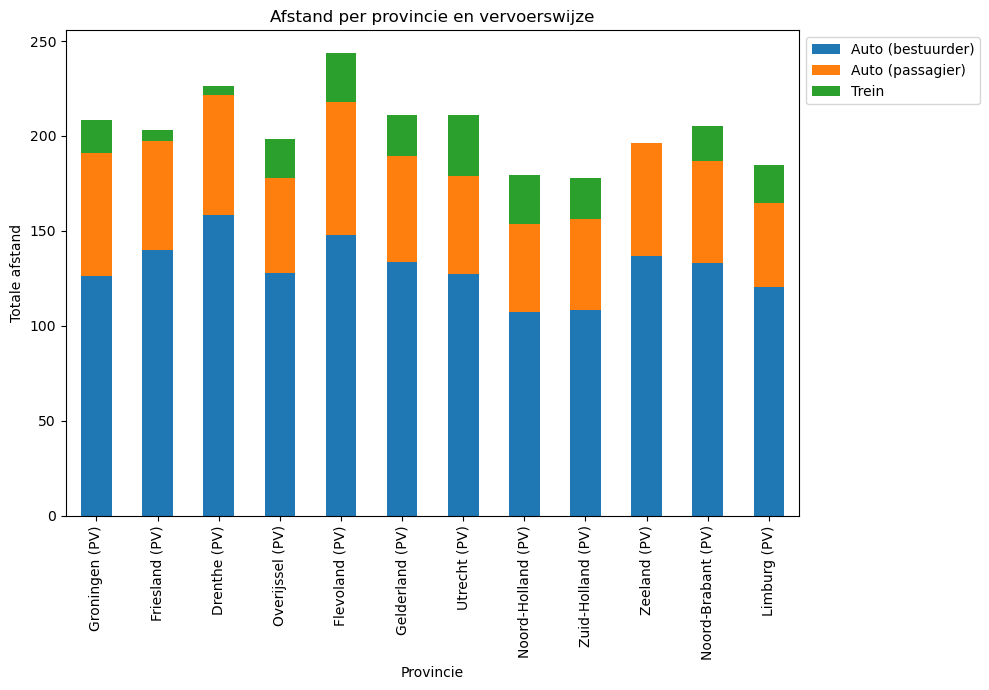

In [17]:
# Maak een samenvatting van de totale afstand per provincie per vervoerswijze
summary_data = {}

for province in provinces:
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    # Haal de afstanden per vervoerswijze op
    car_bestuurder_distance = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']['Afstand_2'].sum()
    car_passagier_distance = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']['Afstand_2'].sum()
    trein_distance = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']['Afstand_2'].sum()
    
    # Totale afstand voor auto's (bestuurder + passagier)
    car_total_distance = car_bestuurder_distance + car_passagier_distance
    
    # Voeg de data toe aan het samenvattingsdict
    summary_data[province] = {
        'Auto (bestuurder)': car_bestuurder_distance,
        'Auto (passagier)': car_passagier_distance,
        'Auto (totaal)': car_total_distance,
        'Trein': trein_distance
    }

# Zet de data om naar een DataFrame voor gemakkelijker plotten
summary_df = pd.DataFrame(summary_data).T

# Maak een staafdiagram
summary_df[['Auto (bestuurder)', 'Auto (passagier)', 'Trein']].plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Afstand per provincie en vervoerswijze')
plt.xlabel('Provincie')
plt.ylabel('Totale afstand')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()